# Image Segmentation using traditional image processing techniques

**Task**: Foreground Background Segmentation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.color import rgb2hsv
from sklearn.cluster import KMeans
from PIL import Image

### Kmeans

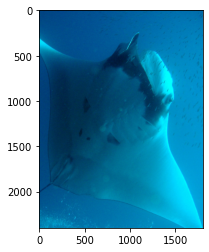

In [2]:
# A glimpse at the image.
dummy_image = '/content/000000003001.jpg'
img = Image.open(dummy_image)
x = np.array(img)
imshow(x)

In [3]:
# stacking RGB image on top of HSV image
z = np.dstack((x,rgb2hsv(x)))
z.shape

(2400, 1801, 6)

In [4]:
vectorized = np.float32(z.reshape((-1,6)))
vectorized.shape

(4322400, 6)

In [5]:
# Applying Kmeans
kmeans = KMeans(random_state=0, init='random', n_clusters=3)
labels = kmeans.fit_predict(vectorized)
labels.shape

(4322400,)

In [6]:
pic = labels.reshape(2400, 1801)
pic.shape

(2400, 1801)

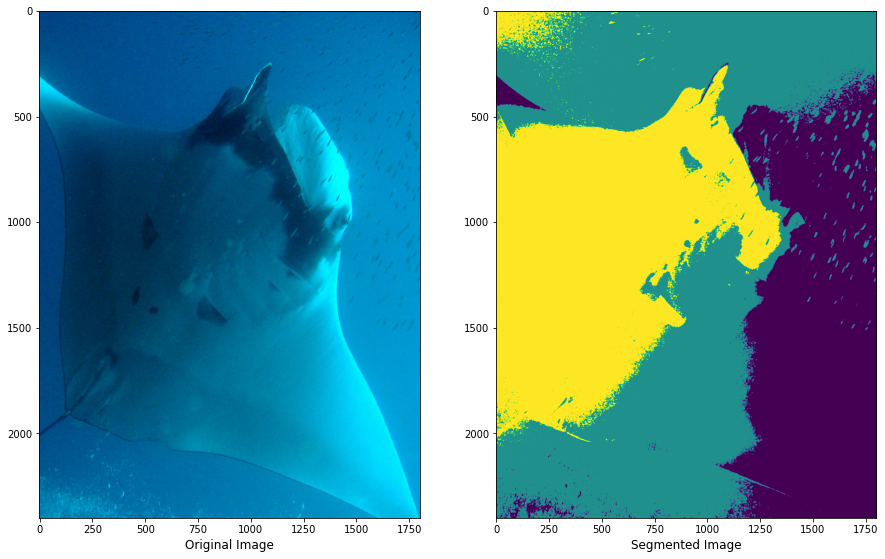

In [7]:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)

# Thresholding methods

Different thresholding methods.
- Global Thresholding
- Adaptive Mean Thresholding
- Adaptive Gaussian Thresholding..

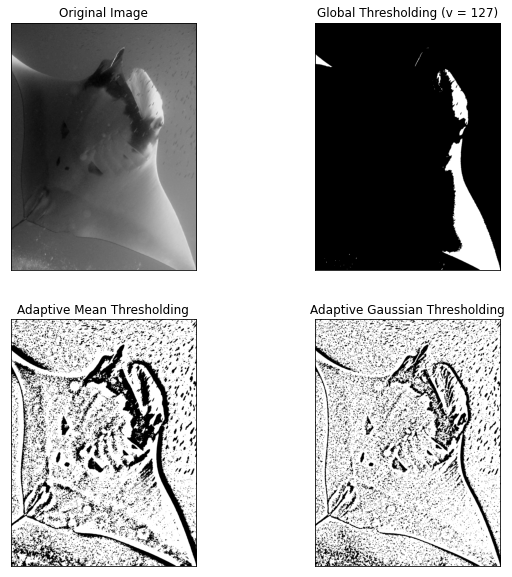

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(dummy_image,0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,101,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,101,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Otsu Method

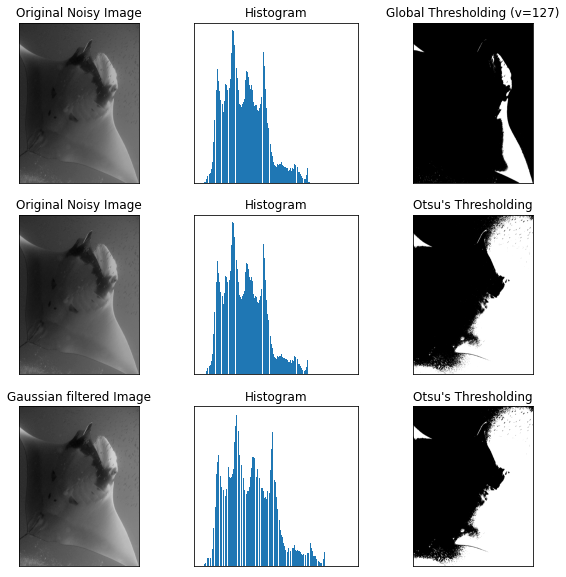

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(dummy_image,0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Extended Research
- ~~Try different k values for Kmeans. Elbow method.~~

In [10]:
inertias = []

K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(vectorized)
    
    inertias.append(kmeanModel.inertia_)

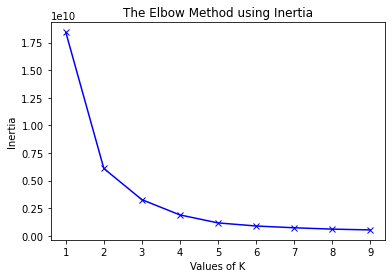

In [11]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

It seems 3 is a good cluster size as per the formation of an elbow. But, this method is not able to perfectly distinguish between the background from the foreground.